## Import Libraries

In [1]:
import sklearn as skl
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

---
## Dataset

O Dataset de teino é constituido por 18835 casos e pelos seguintes atributos:

* **song name:** nome da música
* **song_popularity:** valores entre 0 e 100
* **song_duration_ms:** duração da música em milisegundos; tipicamente valores entre 200k e 300k
* **acousticness:** valores entre 0 e 1
* **danceability:** valores entre 0 e 1
* **energy:** valores entre 0 e 1
* **instrumentalness:** valores entre 0 e 1
* **key:** todas as chaves em oitava codificadas como valores entre 0 e 11, começando com C como 0, C como 1, etc.
* **liveness:** valores entre 0 e 1
* **loudness:** float com valores tipicamente entre -60 e 0
* **audio_mode:** 0 = menor, 1 = maior
* **speechiness:** valores entre 0 e 1
* **tempo:** float com valores tipicamente entre 50 e 150
* **audio_valence:** quão felizes a feliz a música é; valores entre 0 e 1
* **time-signature:** valores entre 1 e 5

---
## Get Data

In [2]:
song_df = pd.read_csv('song_data.csv')
song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [4]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
song_df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [6]:
song_df.nunique()

song_name           13070
song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [7]:
# How many songs are duplicated?
song_df.duplicated().sum()

3909

<AxesSubplot: >

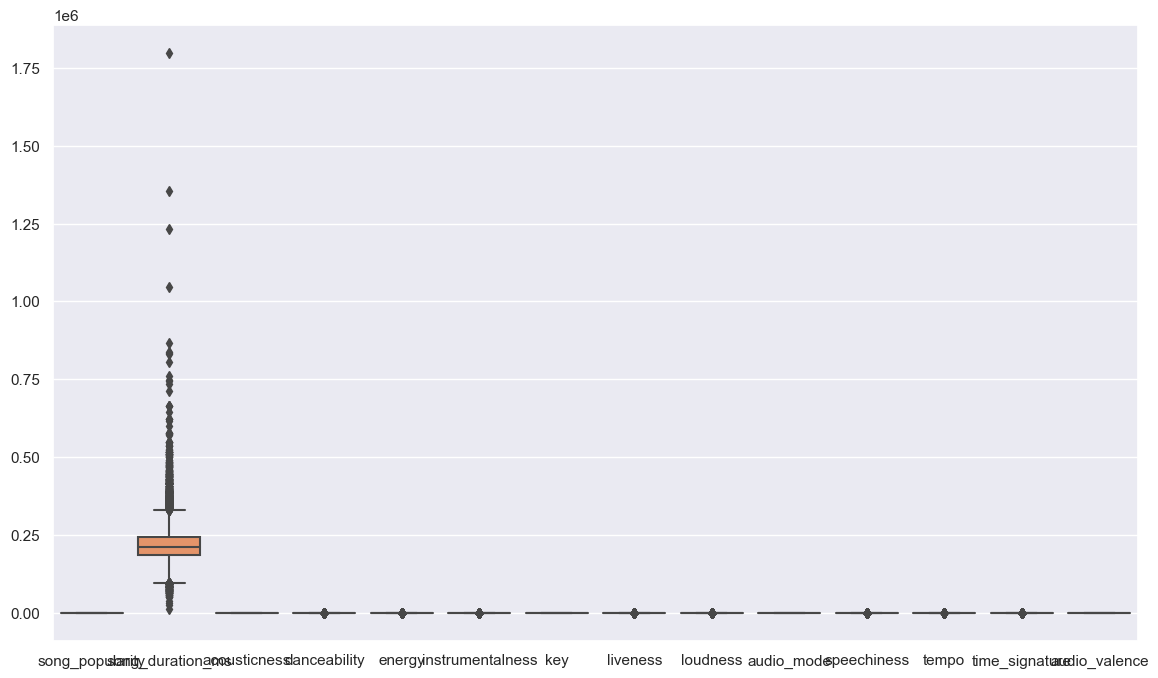

In [8]:
# Outliers boxplot seaborn
sns.set_theme(palette="pastel")
plt.subplots(figsize=(14,8))
sns.boxplot(data=song_df)

<AxesSubplot: >

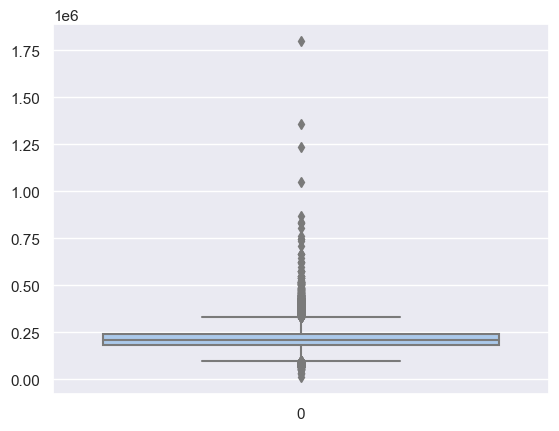

In [9]:
sns.boxplot(data=song_df['song_duration_ms'])

/tmp/ipykernel_200473/2818641056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(song_df.corr(), annot = True, cmap='coolwarm')


<AxesSubplot: >

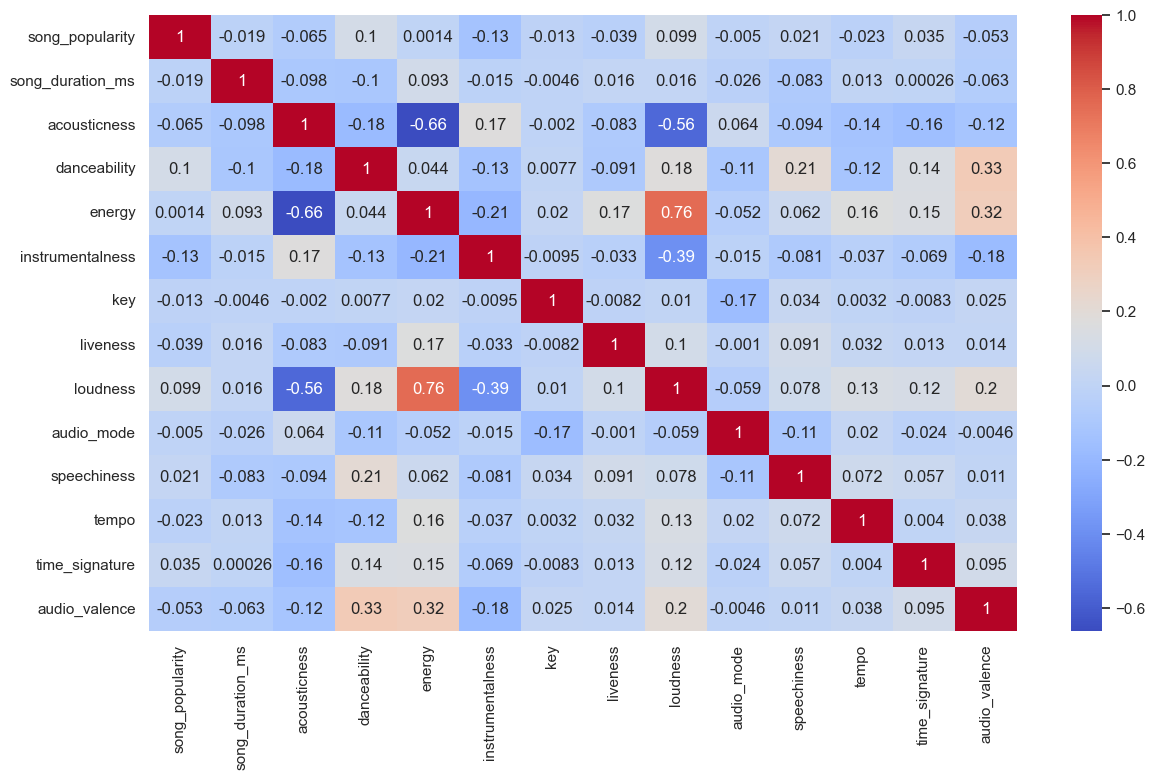

In [10]:
plt.subplots(figsize=(14,8))
sns.heatmap(song_df.corr(), annot = True, cmap='coolwarm')

In [11]:
#Naga
for i in song_df['song_duration_ms'].sort_values(ascending=False).head(10).index:
    print(song_df['song_name'][i], round(song_df['song_duration_ms'][i]/60000,2))


Army Arrangement 29.99
Play 22.6
2112: Overture / The Temples Of Syrinx / Discovery / Presentation / Oracle / Soliloquy / Grand Finale - Medley 20.56
I Have a Dream - The Complete Speech of Martin Luther King Jr. 17.47
Autobahn - 3-D 14.45
Do You Feel Like We Do 13.94
Babarabatiri 13.89
Mambo Inn 13.83
Shakara (Oloje) 13.43
Last Call 12.68
